# Tensorflow with Estimators

As we saw previously how to build a full Multi-Layer Perceptron model with full Sessions in Tensorflow. Unfortunately this was an extremely involved process. However developers have created Estimators that have an easier to use flow!

It is much easier to use, but we sacrifice some level of customization of our model. Let's go ahead and explore it!

## Get the Data

We will use the iris data set.

Let's get the data:

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('iris.csv')

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


*When we deal with the estimators, the column names should be without spaces and the type of target column should be int rather than float. Let us fix these!*

In [4]:
df.columns = ['sepal_length','sepal_width','petal_length','petal_width','target']

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [6]:
df['target'] = df['target'].apply(int)

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


*Lets split the data into feature columns and target column*

In [8]:
X = df.drop('target', axis=1)
y = df['target']

In [9]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

## Train Test Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Estimators

Let's see how to use the simpler Estimator interface!

In [14]:
import tensorflow as tf

## Feature Columns

In [15]:
X.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [17]:
feat_cols = []

for col in X.columns:
    feat_cols.append(tf.feature_column.numeric_column(col))

In [18]:
feat_cols

[NumericColumn(key='sepal_length', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='sepal_width', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='petal_length', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='petal_width', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

## Input Function

*Since the target column is ordered, we are shuffling the Data.*

In [19]:
# There is also a pandas_input_fn we'll see in the exercise!!
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=5,shuffle=True)

In [20]:
# n_classes=3 because there are 3 classes of iris flowers
# hidden_units=[10,20,10] is neurons in hidden layers
classifier = tf.estimator.DNNClassifier(hidden_units=[10,20,10], n_classes=3, feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\VarunCK\\AppData\\Local\\Temp\\tmpj34lmdj5', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018E658D9160>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [21]:
classifier.train(input_fn=input_func, steps=50)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\VarunCK\AppData\Local\Temp\tmpj34lmdj5\model.ckpt.
INFO:tensorflow:loss = 12.977785, step = 1
INFO:tensorflow:Saving checkpoints for 50 into C:\Users\VarunCK\AppData\Local\Temp\tmpj34lmdj5\model.ckpt.
INFO:tensorflow:Loss for final step: 1.928508.


## Model Evaluation

**Use the predict method from the classifier model to create predictions from X_test**

In [22]:
# Here we want predictions on y_test, so we are not giving y value
# For predictions we are providing all the data in a single go
# Since the data has already been shuffled, we are making shuffle aa False
pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=len(X_test), shuffle=False)

In [23]:
# Since classifier.list produces the output in the form of a generator, we need to cast it to a list
note_predictions = list(classifier.predict(input_fn=pred_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\VarunCK\AppData\Local\Temp\tmpj34lmdj5\model.ckpt-50
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [24]:
note_predictions[0]

{'logits': array([-3.9911375e+00,  6.6190958e-04, -4.7773856e-01], dtype=float32),
 'probabilities': array([0.01127213, 0.61041105, 0.37831685], dtype=float32),
 'class_ids': array([1], dtype=int64),
 'classes': array([b'1'], dtype=object)}

*Let us grab the predictions from the `class_ids`*

In [25]:
final_preds = []

for pred in note_predictions:
    final_preds.append(pred['class_ids'][0])

**Now create a classification report and a Confusion Matrix.**

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=final_preds)

In [28]:
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[12  0  0]
 [ 0 16  0]
 [ 0  5 12]]


In [29]:
print('Classification Report:')
print(classification_report(y_true=y_test, y_pred=final_preds))

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        12
          1       0.76      1.00      0.86        16
          2       1.00      0.71      0.83        17

avg / total       0.92      0.89      0.89        45



In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Text(33,0.5,'Predicted Label')

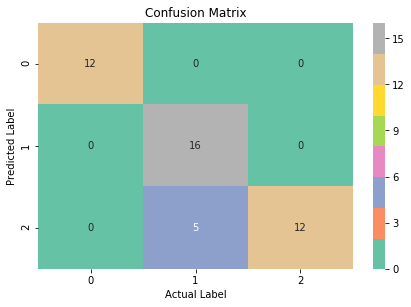

In [33]:
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap='Set2', fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix')
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')

## Thank You!